The [mpld3](https://mpld3.github.io/quickstart.html) package is extremely easy to use: you can simply take any script generating a matplotlib plot, run it through one of mpld3’s convenience routines, and embed the result in a web page.


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [04/Mar/2021 22:13:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 22:13:40] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 22:13:40] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 22:13:40] code 404, message Not Found
127.0.0.1 - - [04/Mar/2021 22:13:40] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


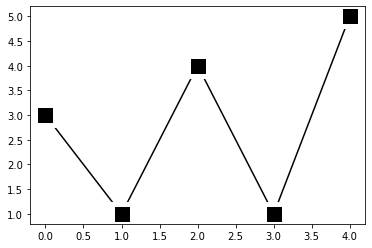

In [2]:
import matplotlib.pyplot as plt, mpld3
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.show()

Showing US Election Choropleth with Folium and mpld3 (Courtesy of [Conor O'Sullivan](https://towardsdatascience.com/us-election-choropleth-with-python-bad8e355f1bd))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth

In [4]:
us_shape = gpd.read_file('https://alicia.data.socrata.com/api/geospatial/jhnu-yfrj?method=export&format=Shapefile')
us_shape = us_shape[['state_name','geometry']]
us_shape

state_name                                           geometry
0                 Hawaii  MULTIPOLYGON (((-160.07380 22.00418, -160.0497...
1             Washington  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...
2                Montana  POLYGON ((-111.47543 44.70216, -111.48080 44.6...
3                  Maine  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...
4           North Dakota  POLYGON ((-98.73044 45.93827, -99.00683 45.939...
5           South Dakota  POLYGON ((-102.78838 42.99530, -103.00588 42.9...
6                Wyoming  POLYGON ((-104.05362 41.69822, -104.05550 41.5...
7              Wisconsin  MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...
8                Vermont  POLYGON ((-73.25806 42.74606, -73.26928 42.747...
9                  Idaho  POLYGON ((-117.02630 43.67903, -117.02379 43.7...
10             Minnesota  POLYGON ((-91.73037 43.49957, -92.07753 43.499...
11          Pennsylvania  POLYGON ((-77.47579 39.71962, -78.09595 39.725...
12                Oregon  POLYGON ((-121.44151 41.99433, -122.28471 42.0...
13         New Hampshire  POLYGON ((-72.27992 42.72047, -72.45577 42.725...
14           Connecticut  POLYGON ((-73.53039 41.52275, -73.51715 41.665...
15          Rhode Island  MULTIPOLYGON (((-71.79019 41.60131, -71.79261 ...
16                  Iowa  POLYGON ((-91.12013 40.70544, -91.12930 40.682...
17         Massachusetts  MULTIPOLYGON (((-71.31933 41.77220, -71.33980 ...
18                  Utah  POLYGON ((-114.04727 38.13765, -114.04509 38.5...
19              Nebraska  POLYGON ((-101.40739 40.00100, -102.05154 39.9...
20              New York  MULTIPOLYGON (((-79.76324 42.26733, -79.44402 ...
21            New Jersey  POLYGON ((-75.48928 39.71486, -75.47597 39.720...
22               Indiana  POLYGON ((-86.34161 38.17729, -86.36435 38.193...
23                Nevada  POLYGON ((-119.15245 38.41180, -119.31883 38.5...
24            California  MULTIPOLYGON (((-121.66522 38.16929, -121.7823...
25                  Ohio  POLYGON ((-83.27276 38.60926, -83.29004 38.596...
26              Maryland  MULTIPOLYGON (((-75.71071 38.64967, -75.70707 ...
27              Illinois  POLYGON ((-88.07159 37.51104, -88.08791 37.476...
28  District of Columbia  POLYGON ((-77.00793 38.96667, -76.91090 38.890...
29              Delaware  POLYGON ((-75.70707 38.55759, -75.71071 38.649...
30              Colorado  POLYGON ((-102.04446 37.64147, -102.04201 37.3...
31         West Virginia  POLYGON ((-79.23166 38.48050, -79.27236 38.437...
32              Kentucky  MULTIPOLYGON (((-86.51067 36.65507, -86.77054 ...
33                Kansas  POLYGON ((-95.07193 37.00148, -95.40662 37.000...
34              Virginia  MULTIPOLYGON (((-79.14406 36.54620, -79.21680 ...
35              Missouri  POLYGON ((-89.10503 36.95392, -89.12965 36.866...
36               Arizona  POLYGON ((-114.52063 33.02771, -114.55909 33.0...
37              Oklahoma  POLYGON ((-94.43932 34.92915, -94.44596 34.735...
38        North Carolina  MULTIPOLYGON (((-83.98845 34.98915, -84.11815 ...
39             Tennessee  POLYGON ((-83.95461 35.45554, -84.01256 35.407...
40                 Texas  MULTIPOLYGON (((-105.99889 31.39394, -106.2132...
41            New Mexico  POLYGON ((-109.04950 32.44204, -109.05135 32.7...
42               Alabama  POLYGON ((-85.07007 31.98070, -85.11515 31.907...
43           Mississippi  POLYGON ((-88.45080 31.43562, -88.43456 31.120...
44               Georgia  MULTIPOLYGON (((-85.13017 31.77885, -85.13156 ...
45        South Carolina  MULTIPOLYGON (((-81.75959 33.19538, -81.76988 ...
46              Arkansas  POLYGON ((-94.46169 34.19677, -94.45262 34.508...
47             Louisiana  MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ...
48               Florida  MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...
49              Michigan  MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ...
50                Alaska  MULTIPOLYGON (((-161.33379 58.73325, -161.3824...

In [6]:
us_shape = gpd.read_file('https://alicia.data.socrata.com/api/geospatial/jhnu-yfrj?method=export&format=Shapefile')
us_shape = us_shape[['state_name','geometry']]
us_shape['state_name']=us_shape['state_name'].apply(lambda x:x.upper())
us_shape.head()

state_name                                           geometry
0        HAWAII  MULTIPOLYGON (((-160.07380 22.00418, -160.0497...
1    WASHINGTON  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...
2       MONTANA  POLYGON ((-111.47543 44.70216, -111.48080 44.6...
3         MAINE  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...
4  NORTH DAKOTA  POLYGON ((-98.73044 45.93827, -99.00683 45.939...

In [7]:
m = folium.Map(location=[50.77500, -100],zoom_start=3) 
choropleth =folium.GeoJson(data= us_shape.to_json())
m.add_child(choropleth)

In [5]:
#Get election data
election = pd.read_csv(r"C:\Users\sarma\Downloads\1976-2020-president.csv" )
election.replace('democratic-farmer-labor','democrat',inplace=True)
election.head()

year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes       party  
0          659170     1182850  20210113    NaN    DEMOCRAT  
1          504070     1182850  20210113    NaN  REPUBLICAN  
2            9198     1182850  20210113    NaN       OTHER  
3            6669     1182850  20210113    NaN       OTHER  
4            1954     1182850  20210113    NaN       OTHER

In [8]:
# Transform election data 
states = set(election['state'])

results = {}
for year in range(1976,2020,4):
    
    result = {}
    for state in states:
        
        state_year = election[(election.year == year) 
                              & (election.state == state)]
        dem = max(state_year[state_year.party == 'DEMOCRAT']['candidatevotes'])
        rep = max(state_year[state_year.party == 'REPUBLICAN']['candidatevotes'])
        
        result[state] = {'dem':dem, 'rep':rep}
        
    results[year] = result

In [9]:
results

{1976: {'SOUTH DAKOTA': {'dem': 147068, 'rep': 151505},
  'GEORGIA': {'dem': 979409, 'rep': 483743},
  'NORTH DAKOTA': {'dem': 136078, 'rep': 153684},
  'DELAWARE': {'dem': 122461, 'rep': 109780},
  'ILLINOIS': {'dem': 2271295, 'rep': 2364269},
  'MICHIGAN': {'dem': 1696714, 'rep': 1893742},
  'TENNESSEE': {'dem': 825879, 'rep': 633969},
  'UTAH': {'dem': 182110, 'rep': 337908},
  'WEST VIRGINIA': {'dem': 435864, 'rep': 314726},
  'MISSISSIPPI': {'dem': 381329, 'rep': 366846},
  'MONTANA': {'dem': 149259, 'rep': 173703},
  'MISSOURI': {'dem': 998387, 'rep': 927443},
  'ALASKA': {'dem': 44058, 'rep': 71555},
  'KANSAS': {'dem': 430421, 'rep': 502752},
  'MAINE': {'dem': 232279, 'rep': 236320},
  'NEVADA': {'dem': 92479, 'rep': 101273},
  'OREGON': {'dem': 490407, 'rep': 492120},
  'WISCONSIN': {'dem': 1040232, 'rep': 1004987},
  'KENTUCKY': {'dem': 615717, 'rep': 531852},
  'OHIO': {'dem': 2009959, 'rep': 2000626},
  'NEW HAMPSHIRE': {'dem': 147645, 'rep': 185935},
  'SOUTH CAROLINA': {

In [10]:
def state_style(state,year,function=False):
    """
    Returns the style for a state in a given year
    """
    
    state_results = results[year][state]
    
    #Set state colour
    if state_results['dem'] >= state_results['rep']:
        color = '#4f7bff' #blue
    else:
        color = '#ff5b4f' #red
    
    #Set state style
    if function == False:
        # Format for style_dictionary
        state_style = {
            'opacity': 1,
            'color': color,
        } 
    else:
        # Format for style_function
        state_style = {
             'fillOpacity': 1,
             'weight': 1,
             'fillColor': color,
             'color': '#000000'}    
  
    return state_style

In [11]:
def style_function(feature):
    """
    style_function used by the GeoJson folium function
    """

    state = feature['properties']['state_name']
    style = state_style(state,year=2016,function=True)
    
    return style

In [12]:
m = folium.Map(location=[50.77500, -100],zoom_start=3)
choropleth =folium.GeoJson(data= us_shape.to_json(),style_function=style_function)
m.add_child(choropleth)

In [13]:
def getFigure(state):
    """
    Plot voting trends from a given state
    """

    #Get number of votes
    years = range(1976,2020,4)
    dems = []
    reps =[]
    for year in years:

        result = results[year][state]
        dems.append(result['dem']/1000000)  
        reps.append(result['rep']/1000000) 

    #Plot number of votes    
    fig = plt.figure(figsize=(8,4))
    plt.plot(years,dems,label='Democrat',color='#4f7bff')
    plt.plot(years,reps,label='Republican',color='#ff5b4f')

    plt.title(state,size = 18)
    plt.ticklabel_format(style='plain')
    plt.xlabel('Year',size =14)
    plt.ylabel('Votes (millions)',size =14)
    plt.legend(loc =0)

    #Add figure to iframe
    html = mpld3.fig_to_html(fig)
    iframe = folium.IFrame(html=html,width = 600, height = 300)

    return iframe

In [14]:

def highlight_style(feature): 
    """
    style_function for when choropleth button
    is highighted
    """
    return {'fillOpacity': 0.2,
         'weight': 1,
         'fillColor': '#000000',
         'color': '#000000'}  

<ipython-input-13-0eff006d88b4>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4))


<Figure size 1296x1008 with 0 Axes>

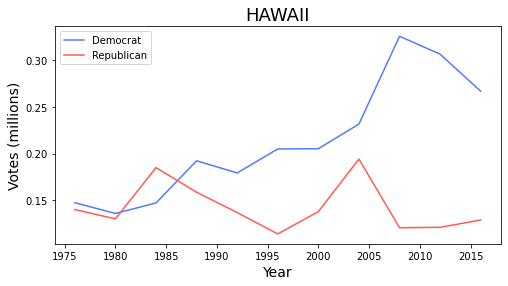

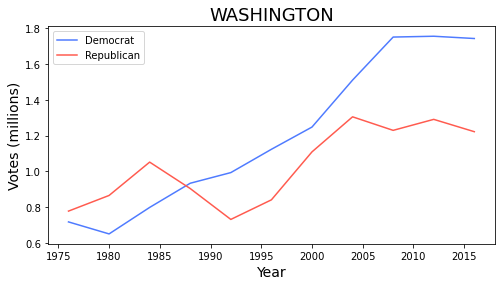

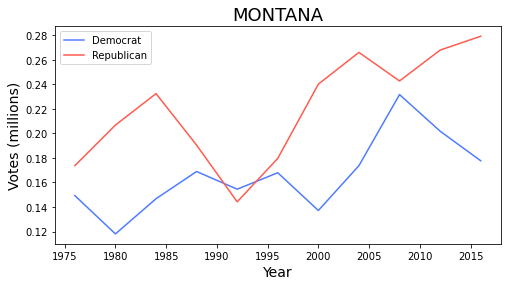

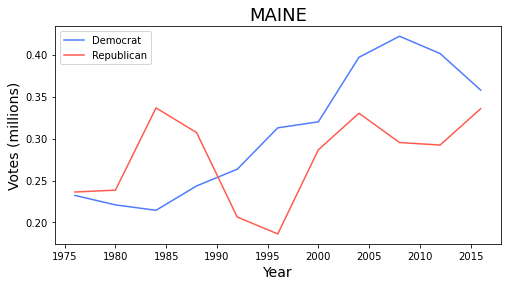

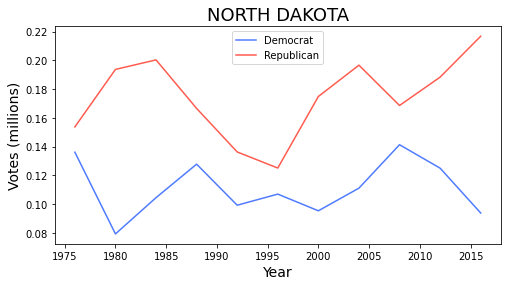

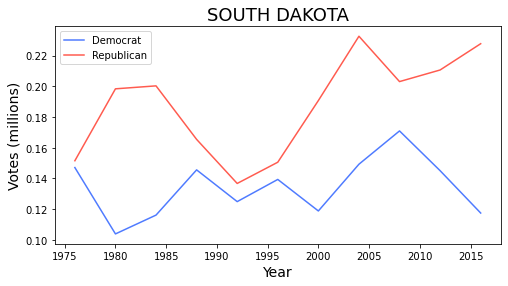

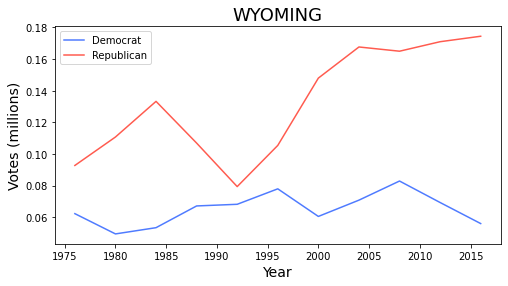

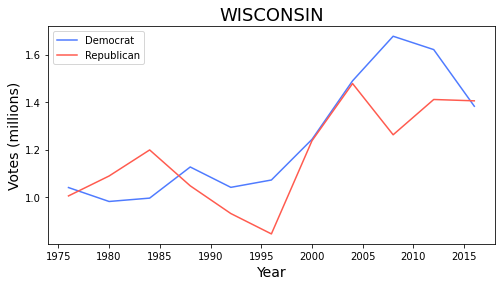

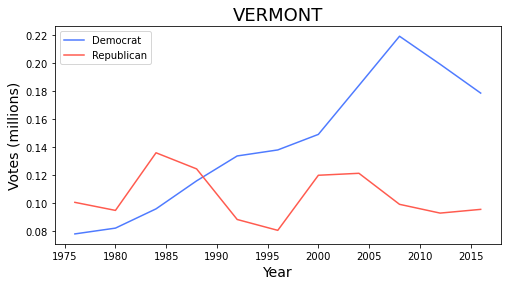

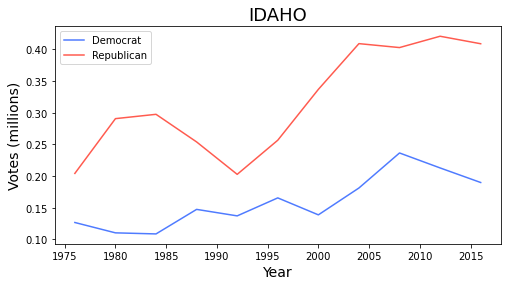

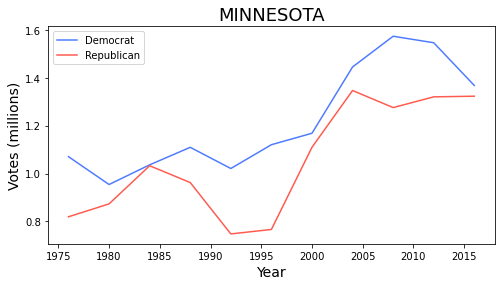

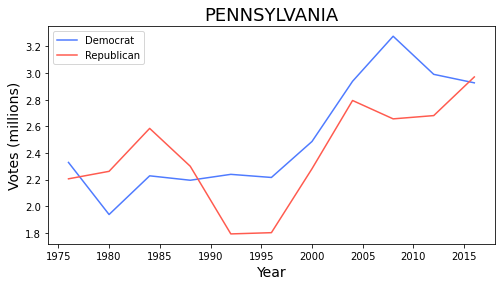

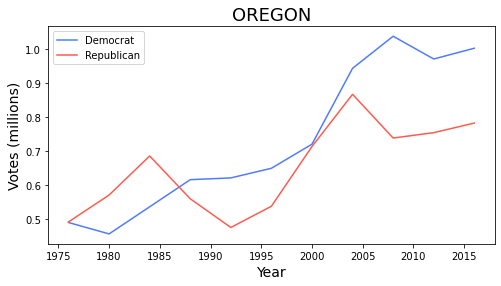

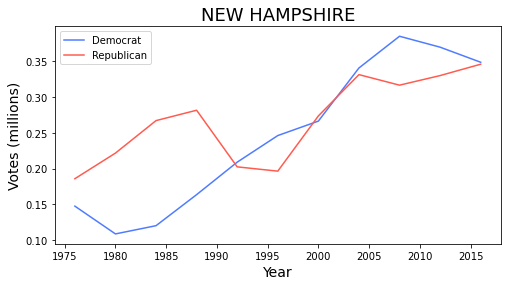

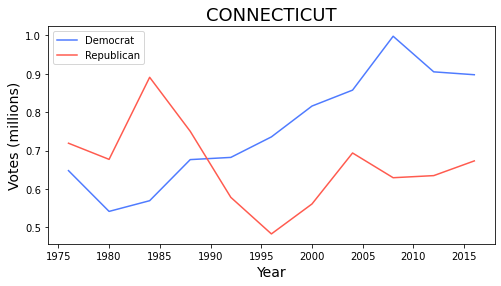

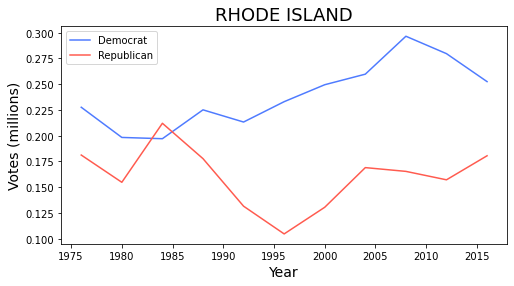

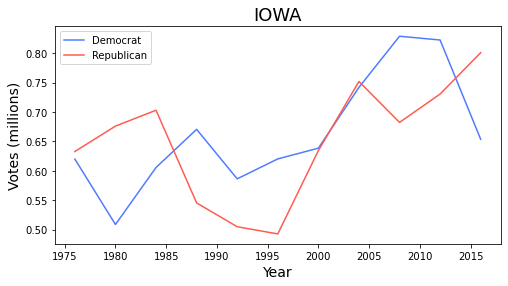

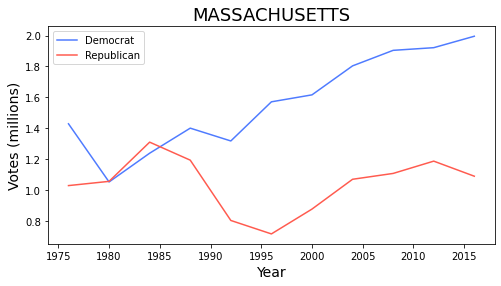

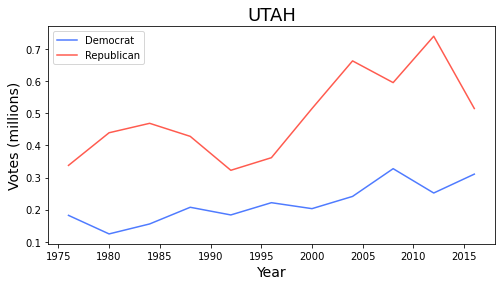

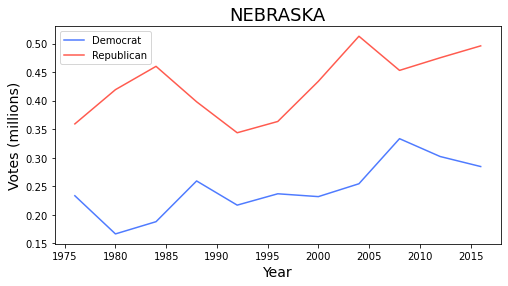

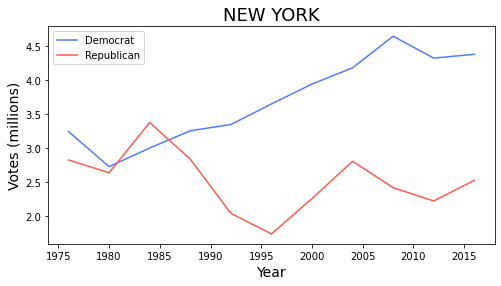

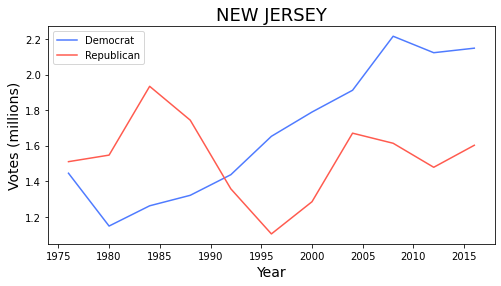

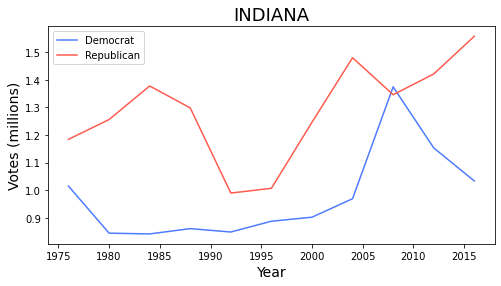

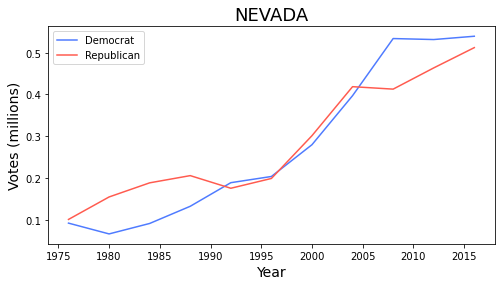

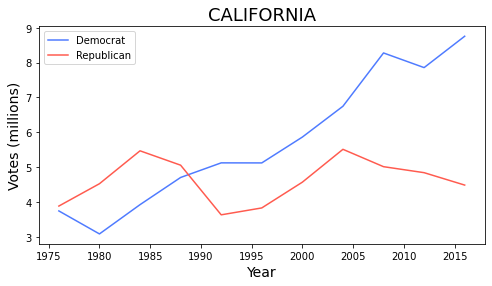

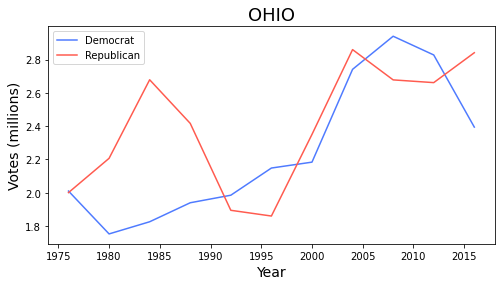

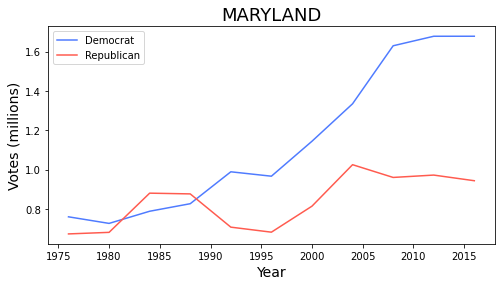

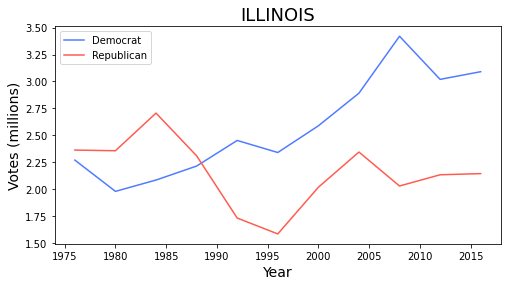

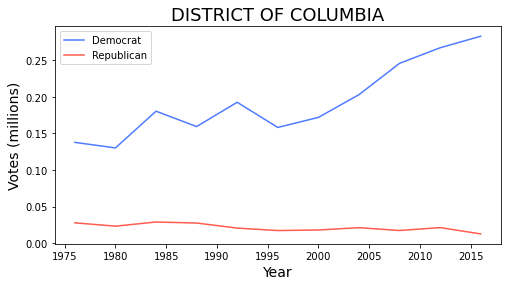

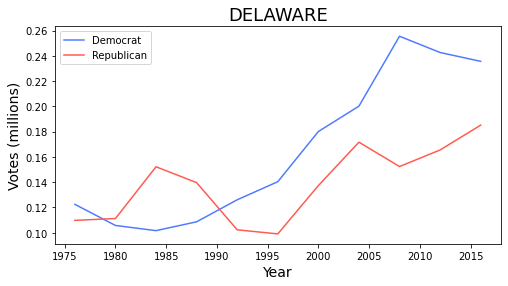

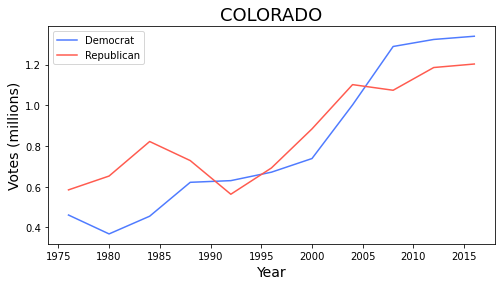

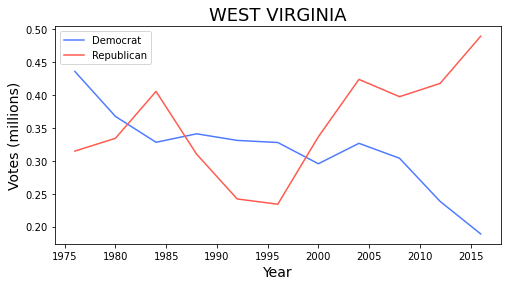

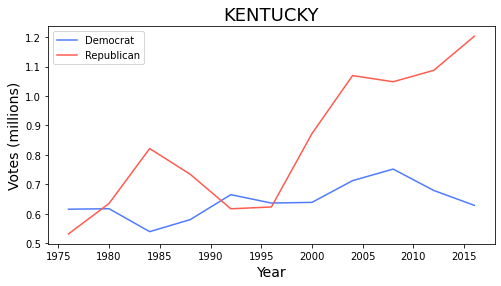

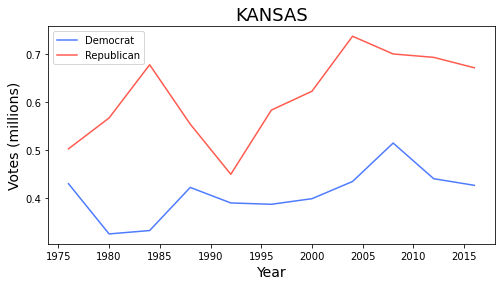

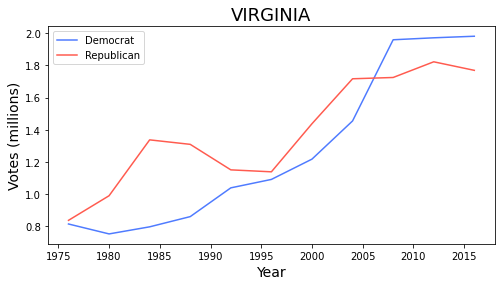

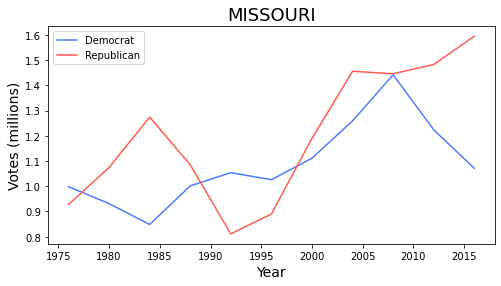

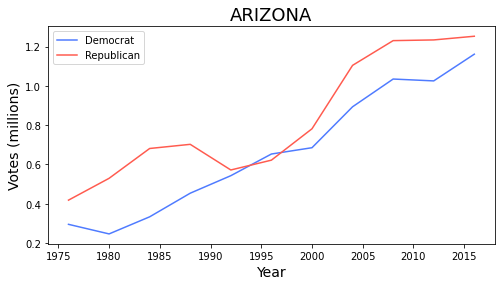

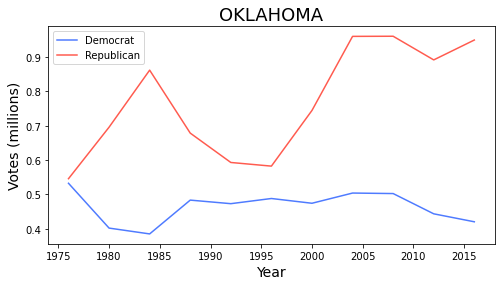

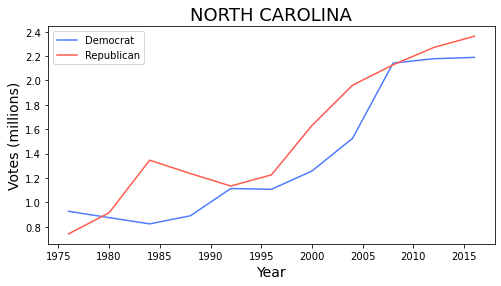

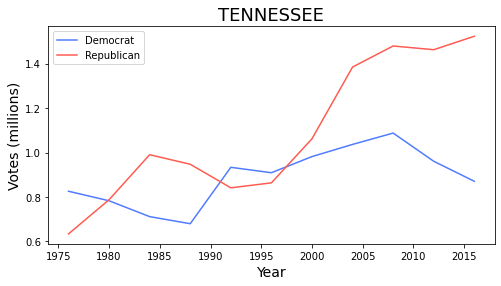

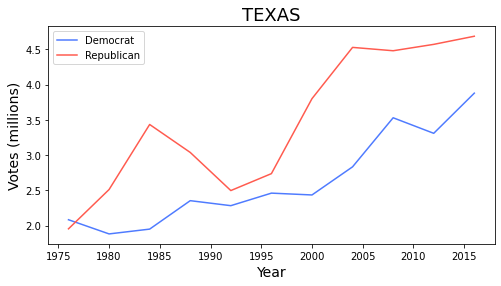

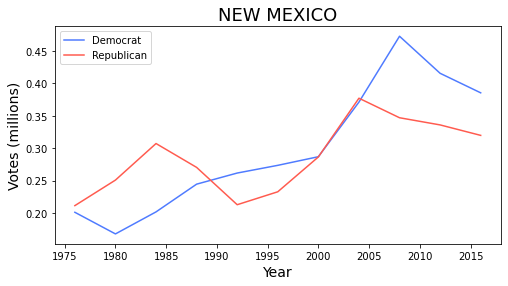

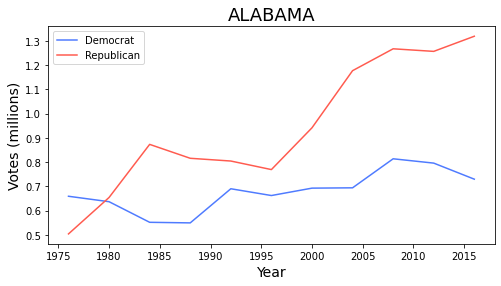

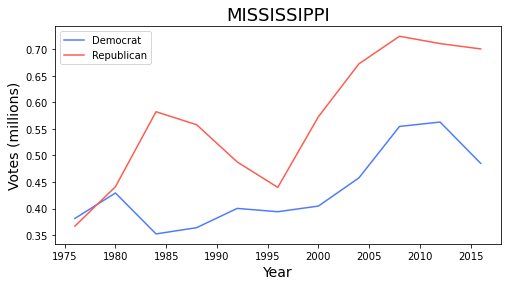

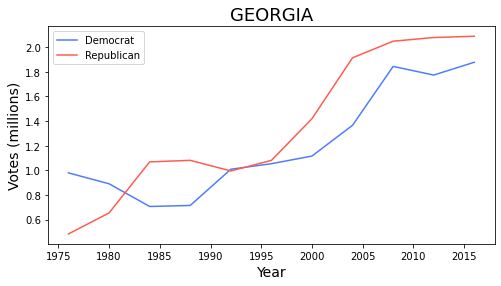

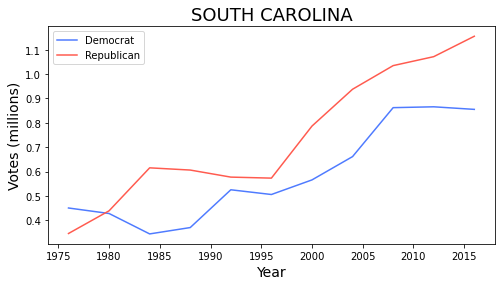

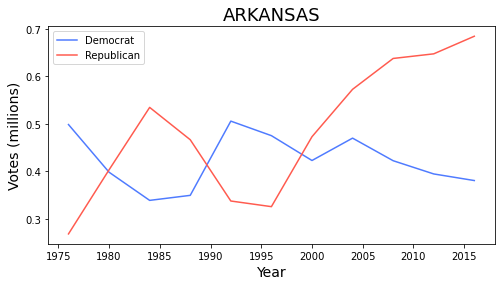

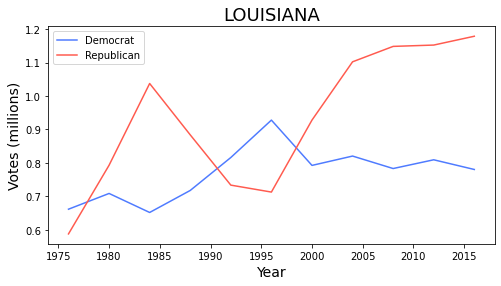

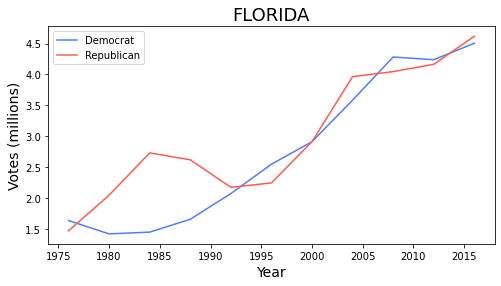

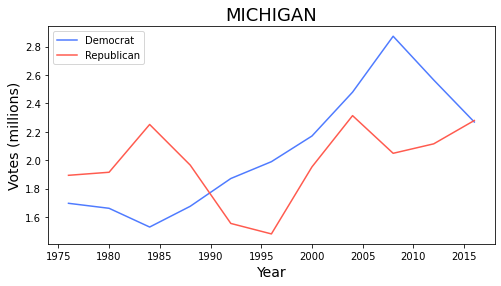

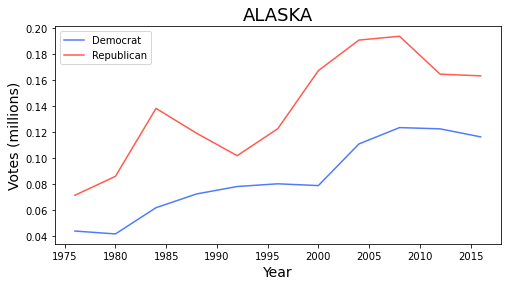

In [15]:
#plot choropleth button map
fig = plt.figure(figsize=(18,14))

m = folium.Map(location=[50.77500, -100],zoom_start=3)
choropleth =folium.GeoJson(data= us_shape.to_json(),
                           style_function=style_function)
m.add_child(choropleth)

#Create popup button for each state
for i in range(len(us_shape)):
    
    geometry = us_shape.loc[i]['geometry']
    state_name = us_shape.loc[i]['state_name']
    popup = folium.Popup(getFigure(state_name),max_width=1000)
    
    state_marker = folium.GeoJson(data=mapping(geometry),
                                  highlight_function = highlight_style)
    state_marker.add_child(popup)
    m.add_child(state_marker)

#m.save("us_election_map2.html")
m